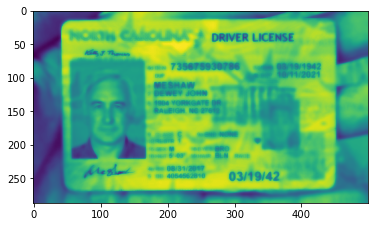

In [1]:
from imutils import contours
import numpy as np
import imutils
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

image = cv2.imread("sample6.jpg")
image = imutils.resize(image, height = 400, width = 500)

gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 9, 75, 75)

plt.imshow(gray)

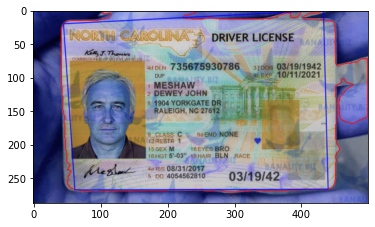

In [2]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# can comment to test
#thresh1 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
#            cv2.THRESH_BINARY,11,2)

#find contours and select the largest one
cnts, hierarchy = cv2.findContours(thresh1,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:5]

#cv2.drawContours(image, cnts, -1, (0,255,0), 4)
cnt = cnts[0]

canvas = image.copy()

arclen = cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, 0.05* arclen, True)

c1 = cv2.drawContours(canvas, [cnt], -1, (255,0,0), 1, cv2.LINE_AA)
c2 = cv2.drawContours(canvas, [approx], -1, (0, 0, 255), 1, cv2.LINE_AA)

plt.imshow(c2)

[[ 45.  20.]
 [433.   0.]
 [440. 266.]
 [ 62. 267.]]
dst [[  0.   0.]
 [387.   0.]
 [387. 265.]
 [  0. 265.]]


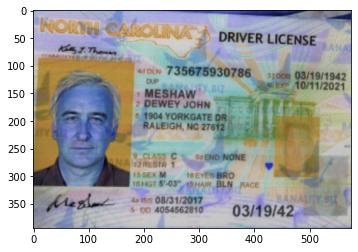

In [3]:
x, y, w, h = cv2.boundingRect(approx)
roi=image[y:y+h, x: x+w]

roi_ad = imutils.resize(roi, height = 480, width = 576)

import four_points_transform
approx = approx.reshape(4,2)

order_pts = four_points_transform.order_points(approx)

wraped = four_points_transform.four_point_transform(image, order_pts)
wraped = imutils.resize(wraped, height = 480, width = 576)

plt.imshow(wraped)

In [11]:
cv2.imwrite('sample6_reshaped.jpg', wraped)

True